In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score

In [2]:
exchange_rate_df = pd.read_csv('exchange_rates.csv')
exchange_rate_df.date= pd.to_datetime(exchange_rate_df.date)
exchange_rate_df.head()

,date,exchange_rate
0,2020-01-01,1.0334
1,2020-01-02,1.0292
2,2020-01-03,1.0283
3,2020-01-04,1.0285
4,2020-01-05,1.0296


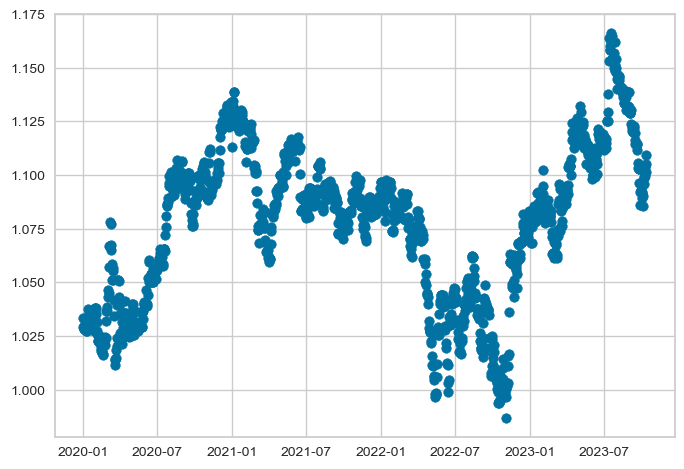

In [3]:
plt.scatter(exchange_rate_df.date, exchange_rate_df.exchange_rate)
plt.show()

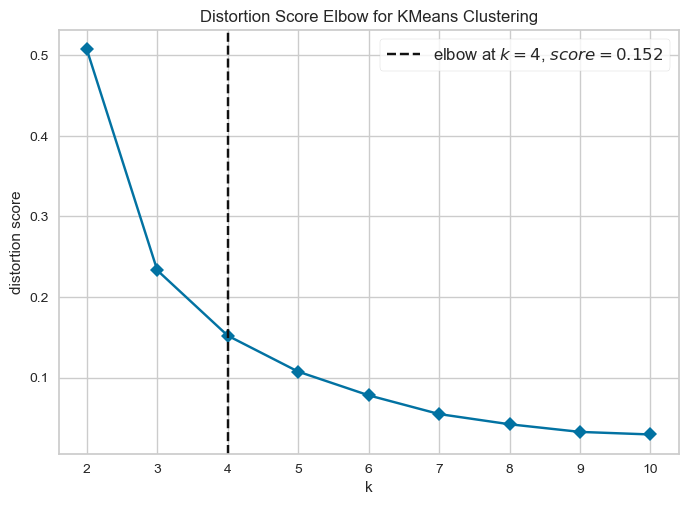

In [4]:
kmeans = KMeans(n_init='auto')
visualizer = KElbowVisualizer(kmeans, k=(2, 11), timings=False)
visualizer.fit(exchange_rate_df[['exchange_rate']])
visualizer.show();

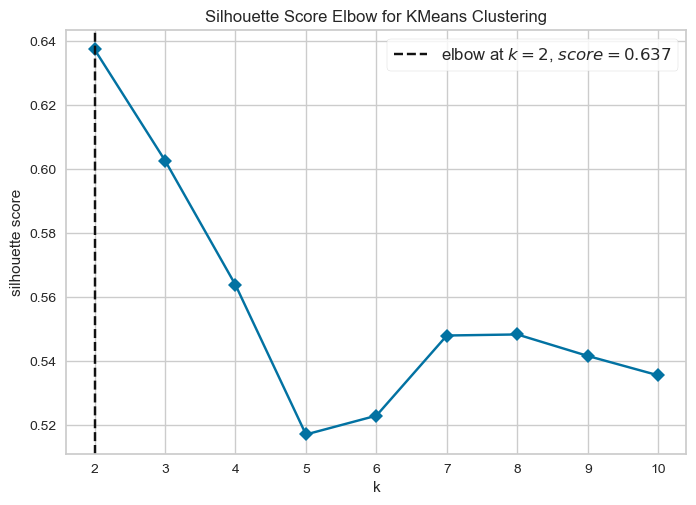

In [5]:
visualizer = KElbowVisualizer(kmeans, k=(2, 11), metric='silhouette', timings=False)
visualizer.fit(exchange_rate_df[['exchange_rate']])
visualizer.show();

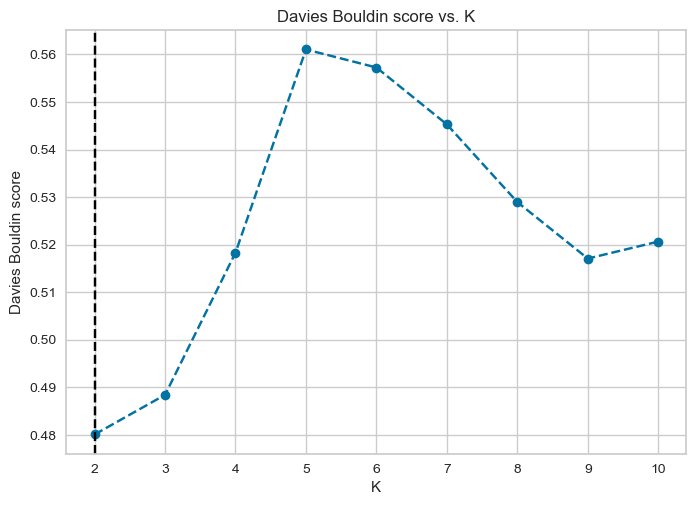

In [6]:
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center, n_init='auto')
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    
    return score


scores = []

centers = list(range(2, 11))
for center in centers:
    scores.append(get_kmeans_score(exchange_rate_df[['exchange_rate']], center))

scores = np.array(scores)
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.axvline(centers[np.argmin(scores)], linestyle='--', color='black')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')
plt.show()

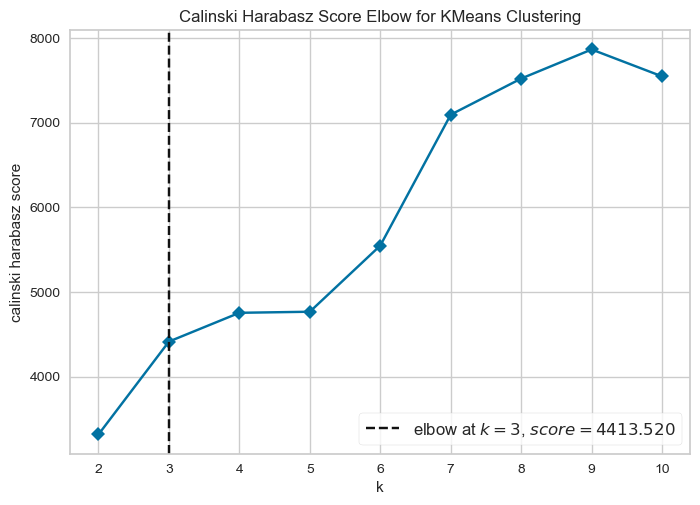

In [7]:
kmeans = KMeans(n_init='auto')
visualizer = KElbowVisualizer(kmeans, k=(2, 11), metric='calinski_harabasz', timings=False)
visualizer.fit(exchange_rate_df[['exchange_rate']])
visualizer.show();

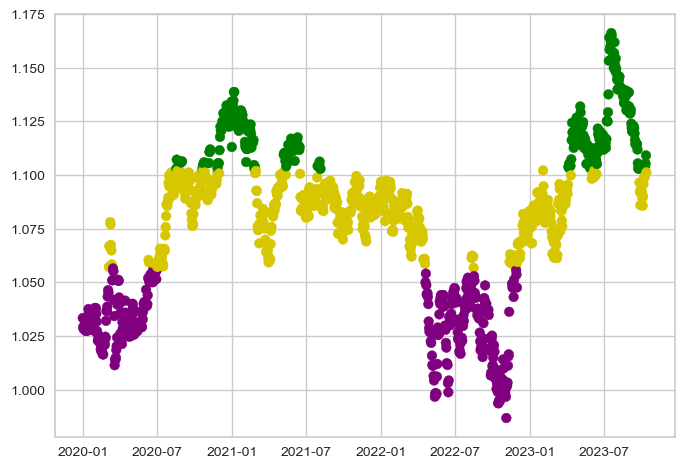

In [8]:
kmeans = KMeans(n_clusters=3, n_init='auto')
clusters = kmeans.fit_predict(exchange_rate_df[['exchange_rate']])
cluster_colors = {0: 'y', 1: 'purple', 2: 'green'}
clusters = np.array(list(map(lambda x: cluster_colors[x], clusters)))
plt.scatter(*exchange_rate_df.columns, data=exchange_rate_df, c=clusters)
plt.show()